# COGS 118A - Project Checkpoint

# Names

- Dominik Zeman
- Ryan Kan
- Himanshi Gupta

# Abstract 

Having a stroke is an incredibly serious health condition that is among one of the leading causes of death worldwide. In this project, we will focus on building a machine learning model that predicts an individual's risk of stroke throughout their lifetime. Timely intervention and detection of strokes in people is important as changing lifestyle habits severely decreases an individual's chances of having a stroke. Thus, this project aims to develop a stroke predictor which can help high-risk people better understand their chances of having a stroke and take preventive measures. We are going to use data collected by the CDC that tracks diabetes, hypertension, and stroke conditions in roughly 70,000 patients. We will evaluate the performance of our model using metrics such as sensitivity, specificity, and accuracy. The project’s outcome can be used in the healthcare industry to identify high-risk people and thus provide preventive measures early on in order to decrease the chances of a stroke occurring.

# Background

Strokes are the leading cause for long term disability and death in the world. According to the CDC every 40 sec someone in the USA has a stroke <a name="cdc"></a>[<sup>[1]</sup>](#cdcnote). This staggering statistic emphasizes the need for early intervention for people with high risk for stroke. Another reason a stroke risk predictor can be a useful tool is that billions of dollars are lost every year due to this epidemic. Between 2017 to 2018, the United States of America lost 53 billion dollars because of stroke-related costs <a name="cdc"></a>[<sup>[1]</sup>](#cdcnote). Implementing preventive measures early on is crucial. A deep learning model to predict stroke mortality in patients was proposed by Seong et al., however, they had indirect and limited data and they weren’t able to use their model for people who already suffer from stroke, reducing the accuracy of their model. Virani et. al. at the American Heart Association found that the leading indicators for stroke are Cardiovascular Health, Tobacco Use, Physical Inactivity, Nutrition, and many other indicators which are traits in the dataset we would use to train this model <a name="virani"></a>[<sup>[2]</sup>](#viraninote). Deep Learning has been a method that has been used for evaluating and predicting stroke patients' health conditions for a while, such as the study by Cheon et al. which demonstrated that mortality predictions could be accurately modeled based on the characteristics of the patients who suffered a stroke <a name="cheon"></a>[<sup>[3]</sup>](#cheonnote). In addition, studies have been conducted to test which machine learning models perform the best when predicting whether or not a patient has a stroke. For example, a study done by Alanazi et. al. concluded that random forest prediction gave the most accurate results <a name="alanzi"></a>[<sup>[4]</sup>](#alanzinote). Given the gravity of the topic of strokes and the research that has been done on it specifically in machine learning, we as students hope to contribute and learn from what has been done.

# Problem Statement

In this project, we aim to develop a machine learning model to predict the risk of stroke in an individual based on their demographic data, lifestyle habits, and clinical measurements. To accomplish this, we will be comparing and contrasting three different models: Neural Network, Support Vector Machines (SVM), and Random Forest. We will train each of these models using different lifestyle attributes as input parameters, which will result in the models outputting a probability of the patient suffering a stroke. We will then use a threshold of 0.5 to classify the data into strokes and not strokes and generate a confusion matrix to evaluate the models' performance. The resulting model can be used not only to analyze stroke risk factors but also as a tool for individuals to enter their characteristics and determine their likelihood of having a stroke.

# Data

- We will be using the Diabetes, Hypertension, and Stroke Prediction dataset from Kaggle<a name="kaggle"></a>[<sup>[5]</sup>](#kagglenote) which comprises 18 observations and 70.7k variables. 

- The observations include Age, Sex, High Cholesterol, Cholesterol Check, BMI, Smoker, Heart Disease or Attack, Physical Activity, Fruits, Veggies, Heavy Alcohol Consumption, General Health, Mental Health, Physical Health, Difficulty Walking, Stroke, High Blood Pressure, and Diabetes.

- The critical variables in the observations are High Cholesterol, Heart Disease or Attack, Stroke, and High Blood Pressure, which are represented as binary values (0 or 1) to indicate the presence or absence of a condition.

- To deal with the categorical features, we plan to use one-hot-encoding, while the numerical features will be normalized to address class imbalance issues in the dataset.


Dataset Source:
https://www.kaggle.com/datasets/prosperchuks/health-dataset

This dataset contains:
- 18 Variables
- 70692 Observations (Patients)
- The dataset concsists of a cleaned version of 253,680 survey responses to the CDC's BRFSS2015 and therefore does not contain any NaN values
- All of these variables are important in determining whether a person is at a high risk of suffering a stroke

- The variables observed and their data types are:
    - Nominal:
        - Sex [1, 0] --> [M, F]
        - High Cholesterol [1,0] --> [Yes, No]
        - CholesterolCheck [1,0] --> [Yes, No]
        - Smoker [1, 0] --> [Yes, No]
        - Heart Diseaseor Attack [1 ,0] --> [Yes, No]
        - Physical Activity [1,0] --> [Yes, No]
        - Fruits [1, 0] --> [Yes, No]
        - Veggies [1, 0] --> [Yes, No]
        - Heavy Alcohol Consumption [1,0] --> [Yes, No]
        - Difficulty Walking [1,0] --> [Yes, No]
        - Stroker [1, 0] --> [Yes, No]
        - High Blood Pressure [1, 0] --> [Yes ,No]
        - Diabetes [1, 0] --> [Yes, No]
    - Ordinal
        - General Health [1, 2, 3, 4, 5] --> [excellent, very good, good, fair, poor]
        - Mental Health [1, 2, 3, 4, 5] --> [excellent, very good, good, fair, poor]
        - Age [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] --> ['18-24', '25-29', '30-34', '35-39', '40-44', 45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
        - Physical Health [1 - 30] --> Days since last health complication
    - Interval
        - BMI

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import seaborn as sns

data = pd.read_csv('data/diabetes_data.csv')
data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [2]:
print('Shape: ' +  str(data.shape))
print()
print('Column Names: ')
print(data.columns)
print()
print('Empty Rows: ')
print(data.isnull().sum())

Shape: (70692, 18)

Column Names: 
Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

Empty Rows: 
Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


In [3]:
readable = pd.read_csv('data/diabetes_data.csv')
readable.replace({'Sex':{0.0:'F', 1.0:'M'}}, inplace=True)
readable.replace({'HighChol':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'CholCheck':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'Smoker':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'HeartDiseaseorAttack':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'PhysActivity':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'Fruits':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'Veggies':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'HvyAlcoholConsump':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'DiffWalk':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'Stroke':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'HighBP':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'Diabetes':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'Age':{1.0: '18-24', 2.0: '25-29', 
                   3.0: '30-34', 4.0: '35-39', 
                   5.0: '40-44', 6.0: '45-49', 
                   7.0: '50-54', 8.0: '55-59',
                   9.0: '60-64', 10.0: '65-69',
                   11.0: '70-74', 12.0: '75-79', 13.0: '80 or older'}}, inplace=True)
readable

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,35-39,M,False,True,26.0,False,False,True,False,True,False,3.0,5.0,30.0,False,False,True,False
1,75-79,M,True,True,26.0,True,False,False,True,False,False,3.0,0.0,0.0,False,True,True,False
2,80 or older,M,False,True,26.0,False,False,True,True,True,False,1.0,0.0,10.0,False,False,False,False
3,70-74,M,True,True,28.0,True,False,True,True,True,False,3.0,0.0,3.0,False,False,True,False
4,55-59,F,False,True,29.0,True,False,True,True,True,False,2.0,0.0,0.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,45-49,F,True,True,37.0,False,False,False,False,True,False,4.0,0.0,0.0,False,False,False,True
70688,65-69,M,True,True,29.0,True,True,False,True,True,False,2.0,0.0,0.0,True,False,False,True
70689,80 or older,F,True,True,25.0,False,True,False,True,False,False,5.0,15.0,0.0,True,False,True,True
70690,70-74,F,True,True,18.0,False,False,False,False,False,False,4.0,0.0,0.0,True,False,True,True


In [17]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the original dataframe
df_zscore = data.copy()

# Normalize the data using Z-score normalization
scaler = StandardScaler()
df_zscore[data.columns] = scaler.fit_transform(df_zscore[data.columns])

df_mean = data.copy()

# Normalize the data using mean normalization
df_mean[data.columns] = df_mean[data.columns] / df_mean[data.columns].mean()

df_subtract_mean = data.copy()

# Normalize the data by subtracting the mean
df_subtract_mean[data.columns] = df_subtract_mean[data.columns] - df_subtract_mean[data.columns].mean()

df_subtract_mean.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,-4.584055,0.543003,-0.525703,0.024741,-3.856985,-0.475273,-0.14781,0.296964,-0.611795,0.211226,-0.042721,0.162918,1.247963,24.189583,-0.25273,-0.062171,0.436542,-0.5
1,3.415945,0.543003,0.474297,0.024741,-3.856985,0.524727,-0.14781,-0.703036,0.388205,-0.788774,-0.042721,0.162918,-3.752037,-5.810417,-0.25273,0.937829,0.436542,-0.5
2,4.415945,0.543003,-0.525703,0.024741,-3.856985,-0.475273,-0.14781,0.296964,0.388205,0.211226,-0.042721,-1.837082,-3.752037,4.189583,-0.25273,-0.062171,-0.563458,-0.5
3,2.415945,0.543003,0.474297,0.024741,-1.856985,0.524727,-0.14781,0.296964,0.388205,0.211226,-0.042721,0.162918,-3.752037,-2.810417,-0.25273,-0.062171,0.436542,-0.5
4,-0.584055,-0.456997,-0.525703,0.024741,-0.856985,0.524727,-0.14781,0.296964,0.388205,0.211226,-0.042721,-0.837082,-3.752037,-5.810417,-0.25273,-0.062171,-0.563458,-0.5


# Proposed Solution

In patients who are prone to suffering a stroke, diagnosis and preventative measures via changes in lifestyle are critical in avoiding a potentially fatal condition such as a stroke. Because of this, models which are able to predict whether a patient is prone to having a stroke are an incredibly useful tool for surveying one's risk of having a stroke.

In our proposed solution we seek to compare the performance of three different classification models: Support Vector Classification, Random Forrest, and Neural Network.

- In order to implement an SVM model we will use SKLearn libraries to train and evaulate the dataset throught a train and test split respectively utilising all 18 measured variables.

- Similarly, in order to implement an Random Forrest model we will use SKLearn libraries to train and evaulate the dataset throught a train and test split respectively utilising all 18 measured variables.

- Our most promising solution to this problem will be a deep neural network. We will train a neural network using Pytorch on our train split and then evaluate its accuracy using our test split. 

While humans might be well versed in disease diagnoses, there are different interactions among the parameters measured in the dataset that are great tellers of whether a person is likely to have a stroke but are almost completely undetectable by human diagnosis methods. Detecting and tuning sensitivity to these interactions is something that machine learning models such as the ones we intent to use are great at picking up and utilising. 

As mentioned before, we will train the models using a train/test split on our data to avoid overfitting to the dataset and to assure generalisability to extrapolated data. We will then use the sensitivity and accuracy scores to evaluate the model performance, making sure to minimize minimize false negatives as having a high false negative rate is dangerous when predicting medical conditions that are potentially fatal. We will not need to utilise cross validation in this classification problem due to the fact that we have abundant data for training and testing the model.

A model like this has previously been created by Kansadub et al. and it has reached an accuracy of 74% <a name="kansadub"></a>[<sup>[6]</sup>](#kansadubnote). While this model accounted for fewer variables, we believe it could serve as a good benchmark in evaluating the accuracy of our own model. 

# Evaluation Metrics

The most common evaluation metric for evaluating neural networks is accuracy, meaning how many test data points from the test set the model classified correctly. In our case, our model would return the probability of the patient having a stroke based on their medical conditions. In order to classify this probability, we would then use a threshold of 0.5 to determine whether the person would have a stroke or not. This would allow us to compare our predicted values to the actual values in the dataset allowing us to create a confusion matrix from which we would subsequently be able to calculate the sensitivity and accuracy. Besides calculating these metrics, this model could be a useful tool in determining your own personal probability of having a stroke based on your own medical history. Models that predict the chance of someone having a stroke have previously been created, reaching an accuracy of roughly 74% <a name="kansadub"></a>[<sup>[6]</sup>](#kansadubnote). Reaching this accuracy would be a good benchmark and potentially surpassing this accuracy would allow us to create a model which more accurately predicts the probability of a person having a stroke as the dataset we are using measured more variables than the one used in the previous studies.

In terms of our research false negatives and false positives will be extremely costly. False positives can cause unnecessary anxiety for patients and additional medical expenses, while false negatives can result in missed opportunities for early intervention and increased risk of stroke. Thus, using precision, recall, and f1 would be useful for us to  correctly identify positive cases while minimizing the number of false positives. In particular, you would want a model that has high precision and recall, which means that it correctly identifies as many true positives as possible while minimizing the number of false positives and false negatives. The formulas for these calculations would be Precision = True Positives / (True Positives + False Positives), Recall = True Positives / (True Positives + False Negatives), F1-score = 2 * ((Precision * Recall) / (Precision + Recall)). Precision will tell usOut of all the patients predicted to have a stroke, how many actually had a stroke? Recall will tell us: Out of all the patients who had a stroke, how many were correctly identified as such by the model? The F1-score would provide a balanced measure of both precision and recall, indicating the overall performance of the model.


# Preliminary results

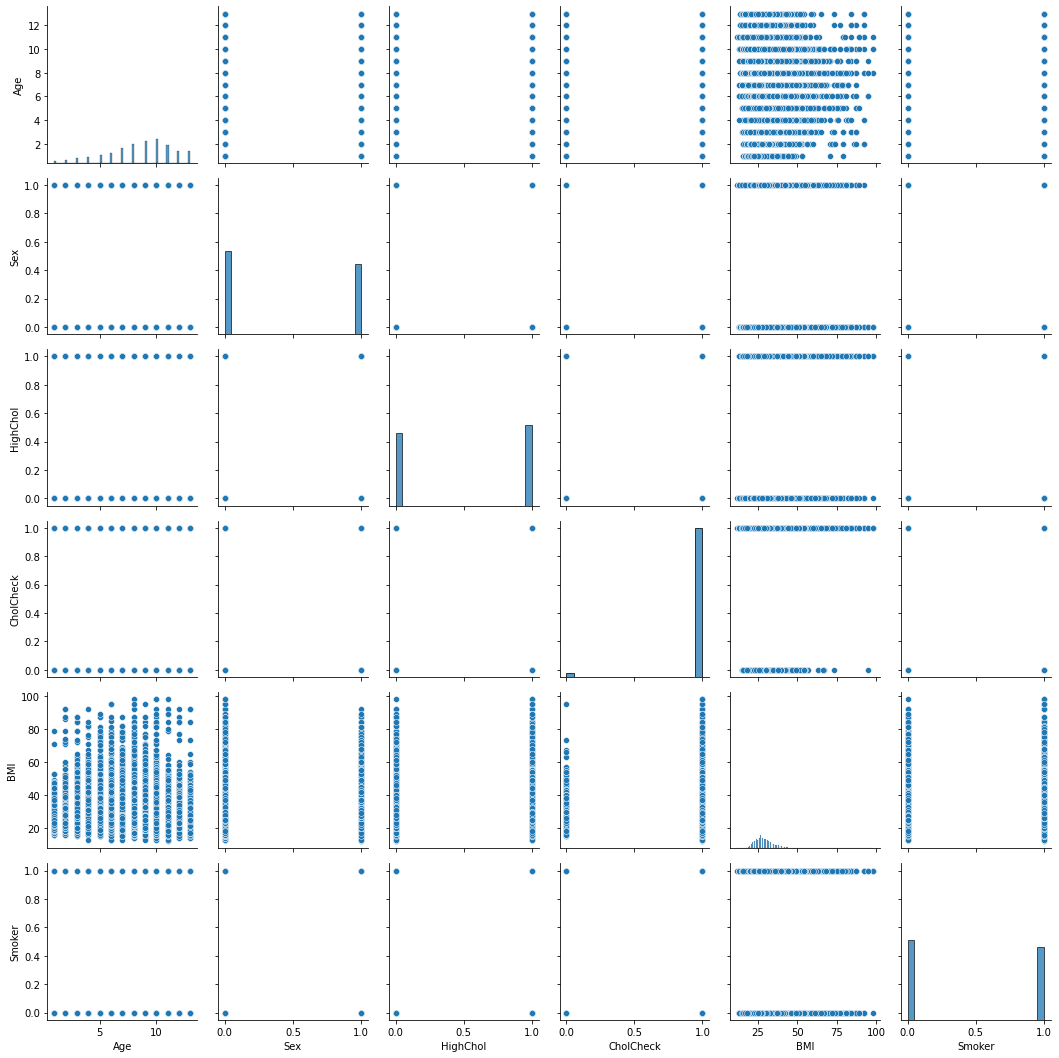

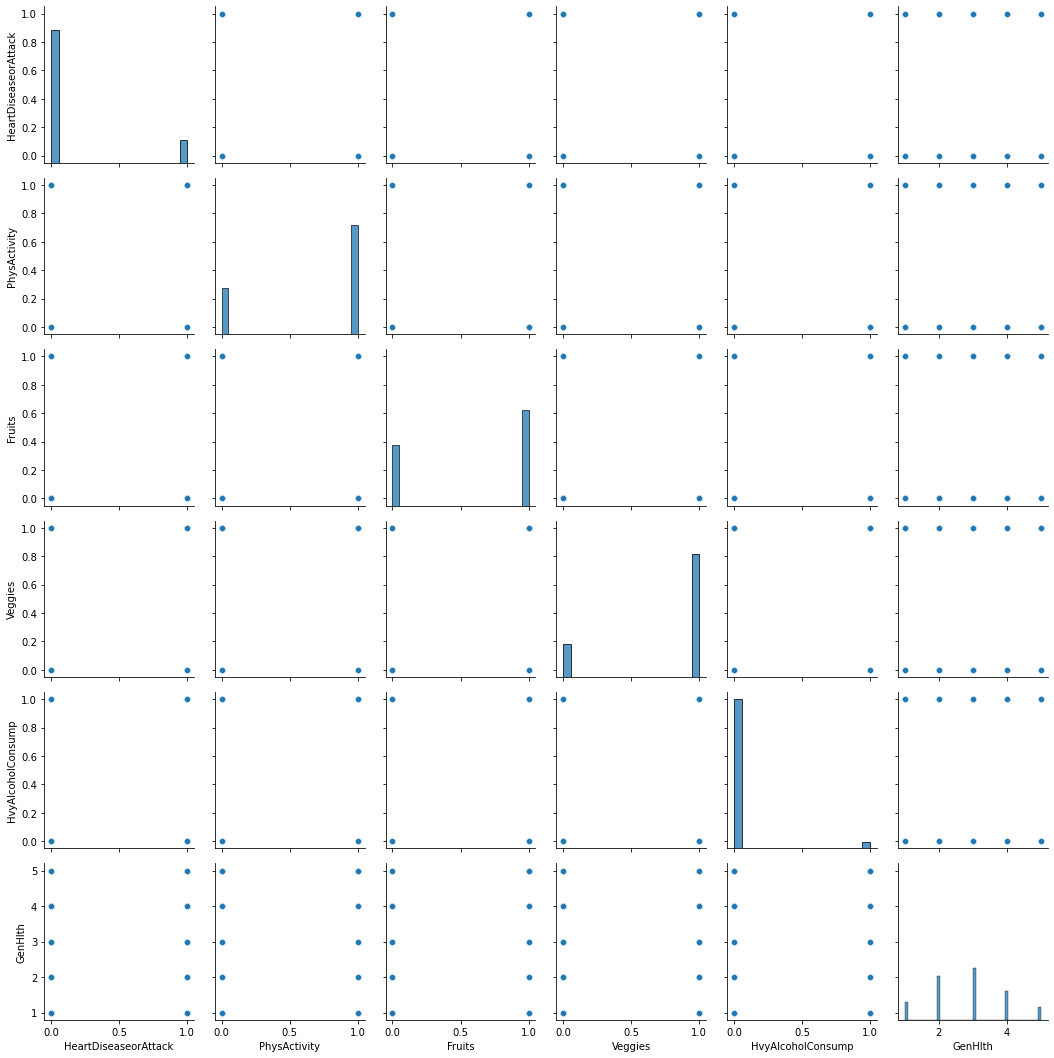

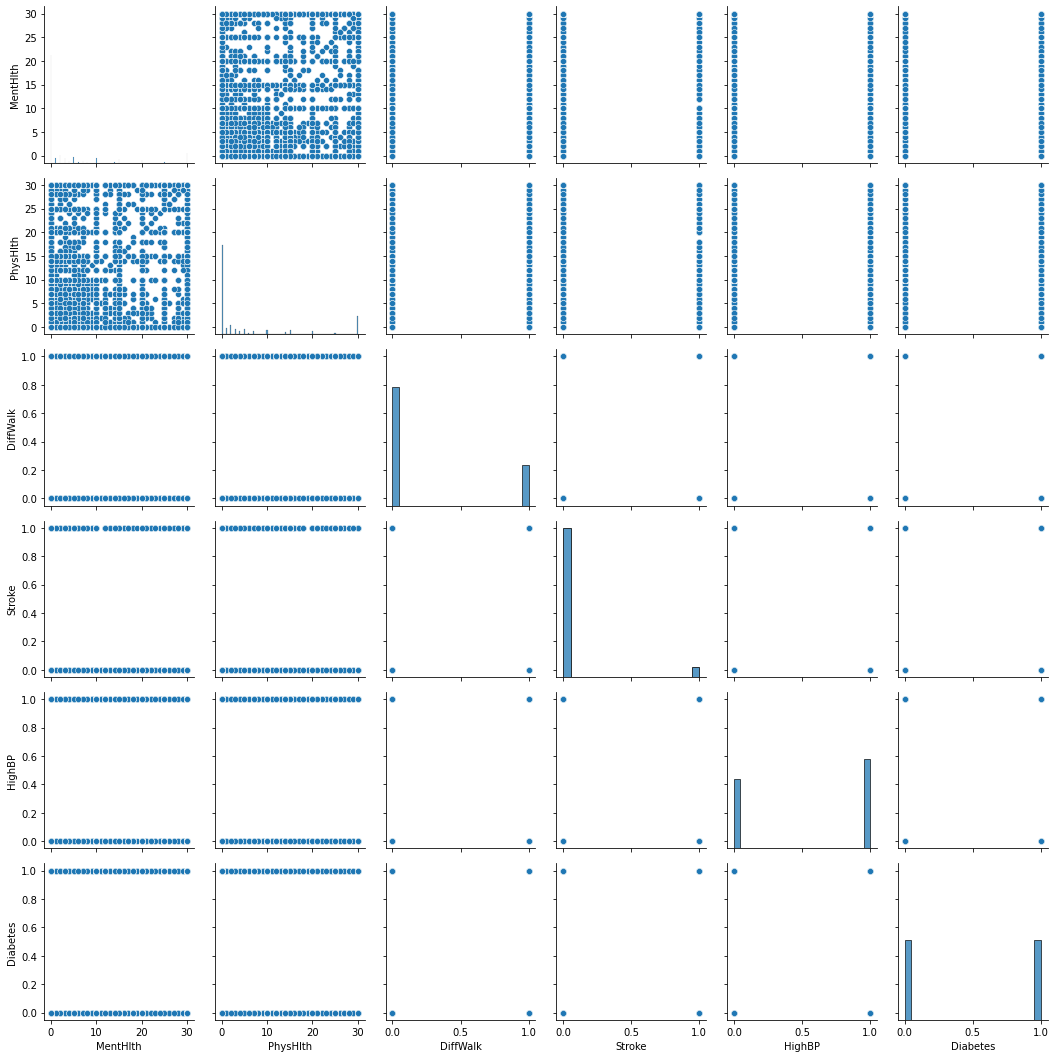

In [4]:
# Vraiables Graphed Against Each other
part_arr = np.array_split(data, 3, axis=1)
for subset in part_arr:
    g = sns.PairGrid(subset)
    g.map_diag(sns.histplot)
    g.map_offdiag(sns.scatterplot)


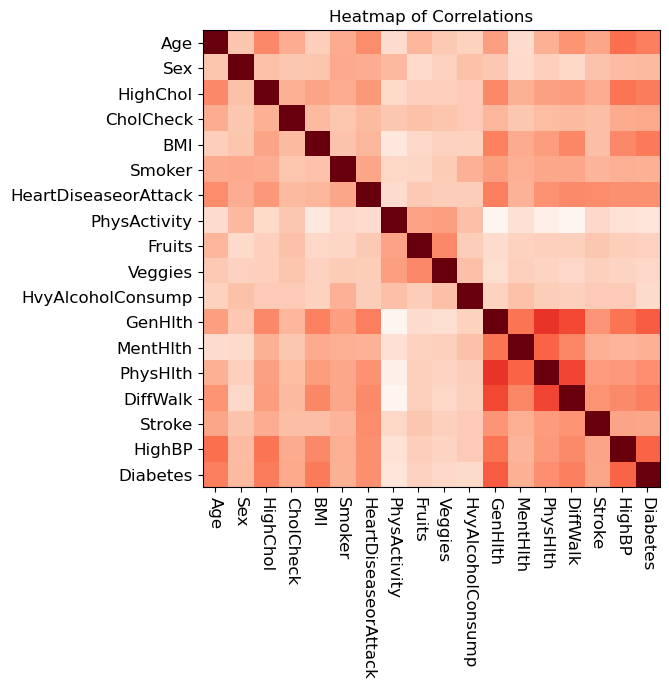

In [5]:
# Graphs the Correlation Matrix
plt.style.use('default')
plt.figure(figsize=(7, 7))
plt.imshow(data.corr(), cmap='Reds', interpolation= 'nearest')
plt.xticks(np.arange(len(data.corr().index.values)), data.corr().index.values, fontsize=12, rotation=-90)
plt.yticks(np.arange(len(data.corr().index.values)), data.corr().index.values, fontsize=12)
plt.title('Heatmap of Correlations')
plt.tight_layout()
plt.show()

In [6]:
# Shows the numerical values of the correlation matrix
data.corr()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
Age,1.000000,-0.002315,0.240338,0.101743,-0.038648,0.105424,0.221878,-0.100753,0.061096,-0.018893,-0.057705,0.155624,-0.101746,0.084852,0.195265,0.123879,0.338132,0.278738
Sex,-0.002315,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,-0.014555,-0.089204,-0.045957,-0.082248,0.003822,0.040819,0.044413
HighChol,0.240338,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.237778,0.083881,0.142610,0.162043,0.099786,0.316515,0.289213
CholCheck,0.101743,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.059213,-0.010660,0.034540,0.044430,0.022529,0.103283,0.115382
BMI,-0.038648,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,0.267888,0.104682,0.161862,0.246094,0.022931,0.241019,0.293373
Smoker,0.105424,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,0.152416,0.091257,0.120698,0.119789,0.064658,0.087438,0.085999
HeartDiseaseorAttack,0.221878,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.275868,0.075057,0.198416,0.232611,0.223394,0.210750,0.211523
PhysActivity,-0.100753,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,-0.273548,-0.130090,-0.234500,-0.276868,-0.079985,-0.136102,-0.158666
Fruits,0.061096,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,-0.098687,-0.062102,-0.048572,-0.050784,-0.008996,-0.040852,-0.054077
Veggies,-0.018893,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,-0.115795,-0.052359,-0.066896,-0.084072,-0.047601,-0.066624,-0.079293


In [13]:
corr_matrix = data.corr()
corr_values = abs(corr_matrix.values.flatten())
sorted_corr_values = np.sort(corr_values)[::-1]

# Get the corresponding pairs of columns for each correlation value
column_pairs = []
used_pairs = set()
for i in range(len(corr_values)):
    if corr_values[i] in sorted_corr_values[:i]:
        continue
    row, col = np.unravel_index(i, corr_matrix.shape)
    pair = (corr_matrix.columns[row], corr_matrix.columns[col])
    if pair[::-1] in used_pairs:
        continue
    column_pairs.append((pair[0], pair[1], corr_values[i]))
    used_pairs.add(pair)

# Sort the pairs by correlation value in descending order
sorted_column_pairs = sorted(column_pairs, key=lambda x: x[2], reverse=True)

# Print the top most correlated pairs
n = 18
for i in range(n):
    pair = sorted_column_pairs[i]
    if(pair[0] == pair[1]):
        continue
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Age and HighBP: 0.3381319300605336
Age and Diabetes: 0.2787380662818881
Age and HighChol: 0.24033775151295428
HighChol and GenHlth: 0.23777820181691697
Age and HeartDiseaseorAttack: 0.22187777953154264
Age and DiffWalk: 0.19526498671365453
HighChol and HeartDiseaseorAttack: 0.18118663814076738
BMI and PhysActivity: 0.1709360770842407
HighChol and DiffWalk: 0.1620434099377237
BMI and PhysHlth: 0.1618620952698098
Age and GenHlth: 0.15562433246675303
Smoker and GenHlth: 0.1524160146904162
HighChol and PhysHlth: 0.1426103521328243
HighChol and BMI: 0.13130948748814897
Smoker and HeartDiseaseorAttack: 0.12441753471724687
Age and Stroke: 0.12387934345416356
Smoker and PhysHlth: 0.12069774026379244


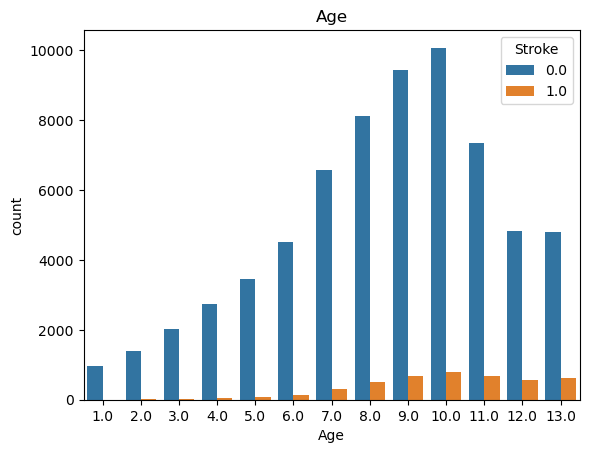

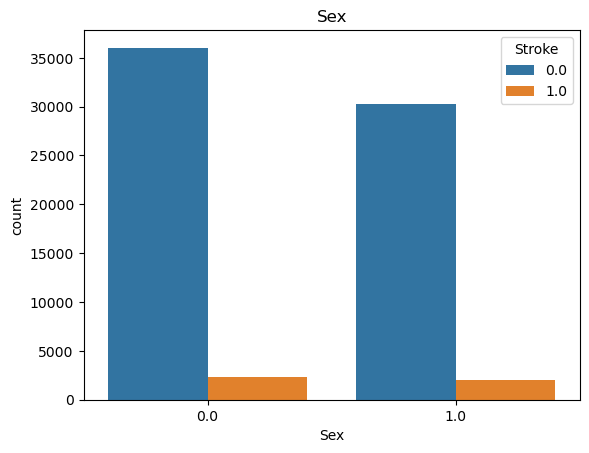

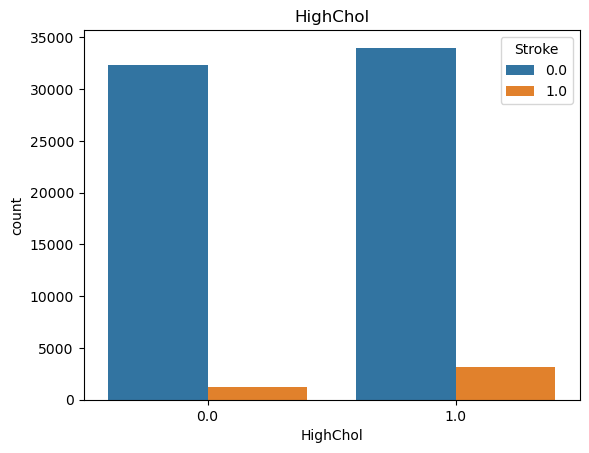

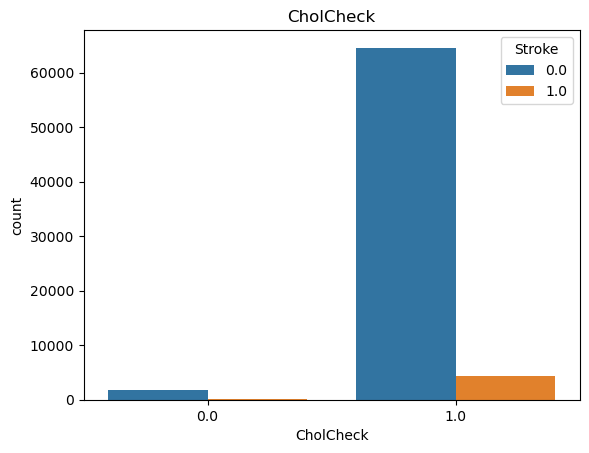

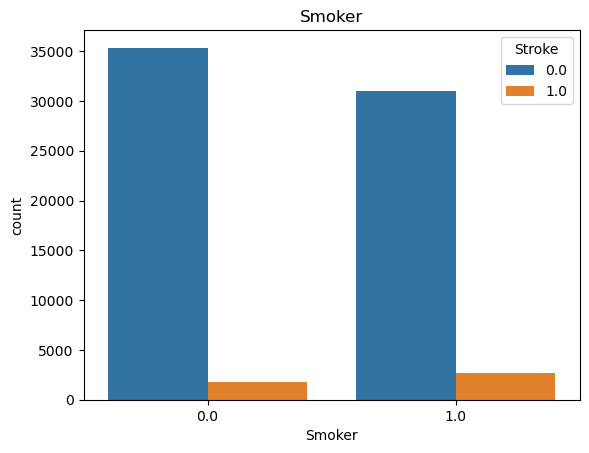

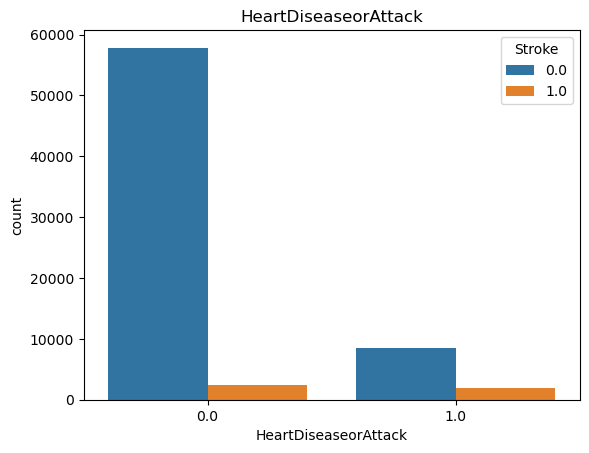

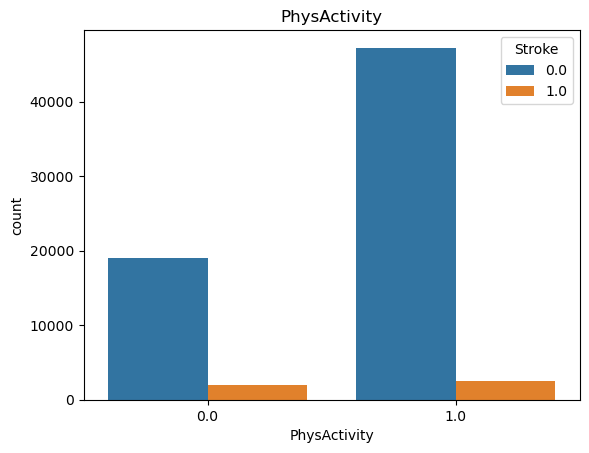

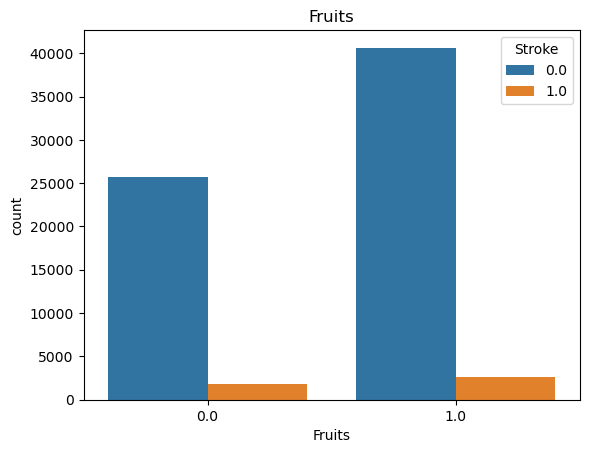

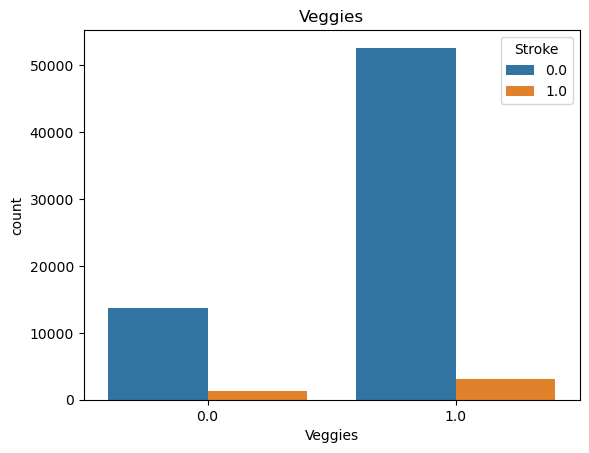

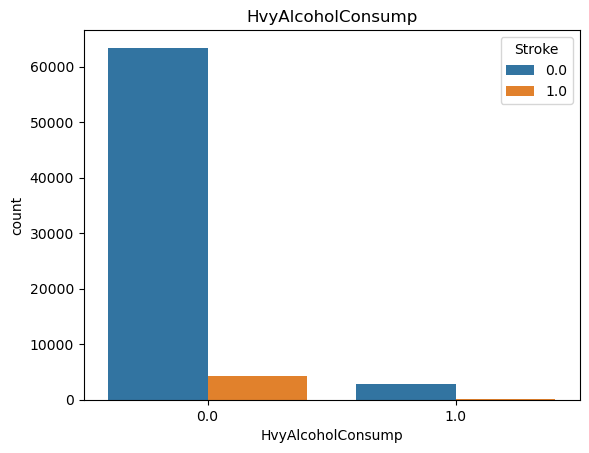

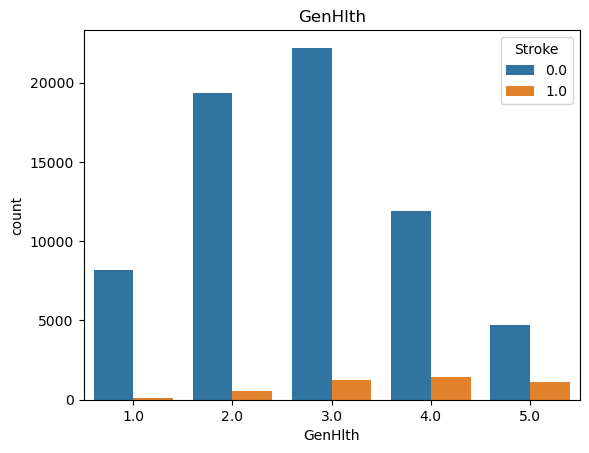

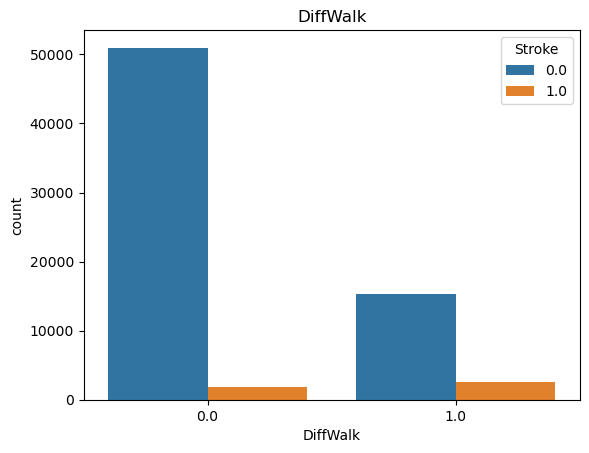

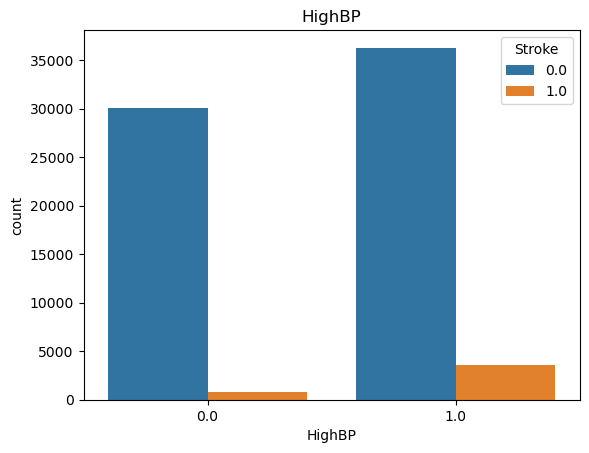

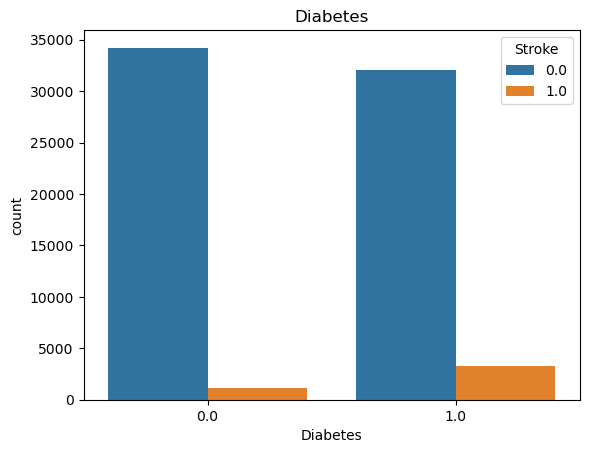

In [8]:
grouped = data.groupby('Stroke')

# Plot a bar chart of each variable against Stroke
for col in data.columns[:]:  # Skip the last column 'Diabetes'
    if col == 'BMI' or col == 'MentHlth' or col == 'PhysHlth' or col =='Stroke':
        continue
    plt.figure()
    plt.title(col)
    sns.barplot(x=col, y='count', hue='Stroke', data=grouped[col].value_counts().rename('count').reset_index())
    plt.show()

In [9]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
X_test = np.array([[-2, -1], [1, 1], [-1, -1], [-2, -2]])
y = np.array([1, 1, 2, 2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
input_size = 18

# Our hidden layer will have input size 500. 
hidden_size = 100 

# num_classes = 10, since we want to classify digits into one of 10 classes 
num_classes = 2

num_epochs = 3

batch_size = 1000

learning_rate = 0.001

In [ ]:
class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes

        self.l1 = nn.Linear(input_size, hidden_size)
        
        self.relu = nn.ReLU()

        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        out = self.l2(x)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

In [ ]:
model

In [ ]:
loss_func = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
# Train the Neaural Network after Setting it up 

In [10]:
svm_clf = SVC()
svm_clf.fit(X, y)
svm_clf.predict(X_test)

array([1, 2, 1, 1])

In [11]:
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X, y)
svm_clf.predict(X_test)

array([1, 2, 1, 1])

# Ethics & Privacy

A possible ethics and privacy concern regarding our project is individual privacy rights regarding their medical information. However, in the case of our project all of the data is anonymized so this would not pose an ethical risk for us. Another risk is getting false negatives where we predict that an individual is not at risk to have a stroke, but in reality, they are actually at risk and end up not taking the proper precautions. One way to combat this would be to adjust the model's threshold. By decreasing the threshold, the model may identify more true positive cases, which can help reduce false negatives. However, this may come at the cost of increasing the number of false positives. Another potential way to combat false negatives would be to have multiple models with different thresholds and compare the results for each individual. Another risk in our project would be using data that is not representative of the population. There is a risk that the models may perpetuate existing biases and inequities in healthcare. For example, the model may produce inaccurate or biased predictions, particularly for individuals from marginalized or underrepresented groups. A way to prevent this from happening would be to have data sets that are diverse and represent multiple different groups of people.

# Team Expectations 

* *Team Expectation 1: We want each group member to communicate their availability to the group and be vocal about when we can have a group meeting*
* *Team Expectation 2: We want to try to meet at least once a week to discuss our groups progress and if we are running into any problems*
* *Team Expectation 3: If we set a deadline for when we want parts of the project completed we want everyone to try their best to meet the deadline. If someone cannot they should communicate with the group as early as possible.*
* *Team Expectation 4: Communicate about coding abilities and distribute work towards the project evenly across the members.*
* *Team Expectation 5: We should always try to creatively explore and analyze the data we are experimenting on as it might yield better results.*

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
    |---|---|---|---|
    | 2/21  |  3 PM |  Brainstorm Topics/Find Dataset (all)  | Search Kaggle for a dataset that would be good to use|
    | 2/22  |  2 PM | Project Proposal (all) | Fill out and submit the project proposal | 
    | 2/26  | 2 PM  |  Meeting times | Assign specific part to each group member  |
    | 03/01 | 6 PM  | EDA (Ryan)| Divide code sections between group members |
    | 03/01 | 6 PM  | Data viz (Himanshi)| Divide code sections between group members |
    | 03/01 | 6 PM  | Model exploration (Dominik)| Divide code sections between group members |
    | 03/07 | 12 PM | Clean data(Ryan)| Go through feedback received, make updates based on it|
    | 03/07 | 12 PM | Split data (Himanshi)| Go through feedback received, make updates based on it|
    | 03/08 | Before 11:59 PM  | Project Check-In (all) | fill out the project check-in and submit it  |
    | 3/10  |  When Avaliable  | Train Model (Dominik) | Start training the model, adjust hyperparameters as you go  |
    | 3/15  |  When Avaliable  | Train Model (all) | Finish training the model on the train split  |
    | 3/17  |  When Avaliable  | Model Evaluations (all) | Write code for model evaluations  |
    | 3/20  |  When Avaliable  | Model Interface (all) | Create a model interface for the user to be able to enter their own data and get their stroke probability  |
    | 3/22  | Before 11:59 PM  | Final Project Submission (all) | Submit the final project  |

# Footnotes
<a name="cdc"></a>1.[^](#cdcnote): Centers for Disease Control and Prevention, Centers for Disease Control and Prevention (14 Oct 2022) "Stroke Facts." https://www.cdc.gov/stroke/facts.htm. <br>

<a name="virani"></a>2.[^](#viraninote): Virani, Salim S., et al. (Circulation, vol. 141, no. 9, 2020) “Heart Disease and Stroke Statistics—2020 Update: A Report from the American Heart Association.” https://doi.org/10.1161/cir.0000000000000757. <br>

<a name="cheon"></a>3.[^](#cheonnote): Cheon, Songhee, et al. (28 May 2019) “The Use of Deep Learning to Predict Stroke Patient Mortality.” https://www.mdpi.com/1660-4601/16/11/1876. <br>

<a name="alanazi"></a>4.[^](#alanazinote): Alanazi, Eman M, et al. (2 Dec 2021) “Predicting Risk of Stroke from Lab Tests Using Machine Learning Algorithms: Development and Evaluation of Prediction Models.” https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8686476/#:~:text=Prediction%20with%20the%20random%20forest,of%20the%20attributes%20were%20used.

<a name="kaggle"></a>5.[^](#kagglenote): Kaggle Data Set https://www.kaggle.com/datasets/prosperchuks/health-dataset <br>

<a name="kansadub"></a>6.[^](#kansadubnote): Kansadub et al. (25 November 2015) "Stroke risk prediction model based on demographic data." https://ieeexplore.ieee.org/document/7399556